# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [1]:
# making an API call
import requests


api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'

# requests.get(api_endpoint+'psyduck')

pokemon = input('Which Pokemon are you looking for?\n')
response = requests.get(f'{api_endpoint}{pokemon}')
# Verify status code
response.status_code
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f'Error, Status Code {response.status_code}')


KeyboardInterrupt: Interrupted by user

### Display a Pokemon's name, weight, abilities, and types

In [24]:
# get the name
my_name = data['forms'][0]['name']

In [48]:
# get types
#my_types = data['types']

type = data['types']
my_type = [type_dict['type']['name'] for type_dict in types]

In [26]:
# get weight
my_weight = data['weight']

In [19]:
# get abilities
data['abilities'][1]['ability']

{'name': 'chlorophyll', 'url': 'https://pokeapi.co/api/v2/ability/34/'}

In [23]:
abilities = data['abilities']
my_abilities = [ability_dict['ability']['name'] for ability_dict in abilities]
print(my_abilities)

['overgrow', 'chlorophyll']


In [42]:
# Create a structure for a single pokemon
my_pokemon = {
            'Name' : my_name, 
            'Type' : my_type, 
            'Weight' : my_weight, 
            'Abilities' : my_abilities
             }
print(my_pokemon)

{'Name': 'bulbasaur', 'Type': ['grass', 'poison'], 'Weight': 69, 'Abilities': ['overgrow', 'chlorophyll']}


#### Create a function to Pull in your own Pokemon's data 

In [8]:
# access api
# check status code
# access dict keys : abilities, types, name, weight
# store values in local dict
import requests
api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'

def poke_api_call(pokemon):
    
    pokemon_dict = {}
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    if response.status_code == 200:
        print('Success!')
        data = response.json()
        my_name = data['forms'][0]['name']
        types = data['types']
        my_types = [type_dict['type']['name'] for type_dict in types]
        my_weight = data['weight']
        data['abilities'][1]['ability']
        abilities = data['abilities']
        my_abilities = [ability_dict['ability']['name'] for ability_dict in abilities]
        pokemon_dict = {
            'Name' : my_name, 
            'Type' : my_types, 
            'Weight' : my_weight, 
            'Abilities' : my_abilities
             }
    else:
        print(f'Error: Invalid Choice - {response.status_code}')

    return pokemon_dict

print(poke_api_call('charizard'))

Success!
{'Name': 'charizard', 'Type': ['fire', 'flying'], 'Weight': 905, 'Abilities': ['blaze', 'solar-power']}


Choose your pokemon

In [21]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]


print(random_team)
your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


[302, 383, 889, 29, 691, 372]


In [22]:
your_team_dict = {pokemon: poke_api_call(pokemon) for pokemon in your_team}

print(your_team_dict)

Success!
Success!


IndexError: list index out of range

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [19]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for i in random_team:
    poke_dict = poke_api_call(i)
    my_six_pokemon[poke_dict['Name']] = poke_dict
    
print(my_six_pokemon)

Success!
Success!
Success!
Success!
Success!
Success!
{'stufful': {'Name': 'stufful', 'Type': ['normal', 'fighting'], 'Weight': 68, 'Abilities': ['fluffy', 'klutz', 'cute-charm']}, 'palossand': {'Name': 'palossand', 'Type': ['ghost', 'ground'], 'Weight': 2500, 'Abilities': ['water-compaction', 'sand-veil']}, 'trevenant': {'Name': 'trevenant', 'Type': ['ghost', 'grass'], 'Weight': 710, 'Abilities': ['natural-cure', 'frisk', 'harvest']}, 'hawlucha': {'Name': 'hawlucha', 'Type': ['fighting', 'flying'], 'Weight': 215, 'Abilities': ['limber', 'unburden', 'mold-breaker']}, 'beheeyem': {'Name': 'beheeyem', 'Type': ['psychic'], 'Weight': 345, 'Abilities': ['telepathy', 'synchronize', 'analytic']}, 'lilligant': {'Name': 'lilligant', 'Type': ['grass'], 'Weight': 163, 'Abilities': ['chlorophyll', 'own-tempo', 'leaf-guard']}}


## Lets create a class called 'Pokemon' and create our pokemon as instances

In [13]:
#pokemon = {
#    'abilities' : ['abilities'],
#    'name' : data['name'],
#    'types' : data['types'],
#    'weight' : data['weight']
#}

In [70]:
class Pokemon():
    
    def __init__(self, name, nickname):
        self.name = name
        self.nickname = nickname
        self.abilitities = []
        self.types = []
        self.weight = None
        self.image = None
        self.move = move_tutor {}
        self.call_poke_api()
        
    def call_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if response.status_code == 200:
            print('Success!')
            data = response.json()
            self.name = data['name']
            self.abilities = [ability_object['ability']['name'] for ability_object in data['abilities']]
            self.types = [type_object['type']['name'] for type_object in data['types']]
            self.weight = data['weight']
            self.image = data['sprites']['versions']['generation-v']['black-white']['animated']['front_default']
            if not self.image:
                self.image = data['sprites']['other']['dream_world']['front_default']
            if not self.image:
                self.image = data['sprites']['front_default']
        else:
            print(f'Error status code: {response.status_code}')
                                



Success!
Success!
misdreavus
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/versions/generation-v/black-white/animated/200.gif


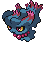

In [97]:
from IPython.display import Image
new_poke = Pokemon('pikachu', 'zappy rodent')
new_poke.call_poke_api
another_poke = Pokemon('200', 'vine turtle')
another_poke.name
print(another_poke.name)
print(another_poke.image)
display(Image(another_poke.image))

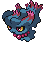

In [72]:
from IPython.display import Image

display(Image(another_poke.image))

### Let's Catch some Pokemon

In [81]:
dylans_pokemon = ['snorlax', 'psyduck', 'zapdos', 'hitmonlee']

In [85]:
for pokemon in dylans_pokemon:
    pokedex[pokemon] = Pokemon(pokemon, 'generic name')
    
print(pokedex)

Success!
Success!
Success!
Success!
{'snorlax': <__main__.Pokemon object at 0x000001B00CB6A9B0>, 'psyduck': <__main__.Pokemon object at 0x000001B00CAF24A0>, 'zapdos': <__main__.Pokemon object at 0x000001B00CC4FC10>, 'hitmonlee': <__main__.Pokemon object at 0x000001B00CBAF340>}


In [84]:
pokedex = {pokemon:Pokemon(pokemon,'nickname') for pokemon in dylans_pokemon}


Success!
Success!
Success!
Success!


In [88]:
class Pokedex:
    
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
        
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = Pokemon(pokemon, 'monster')
        
new_pokedex = Pokedex('chris')

new_pokedex.add_pokemon('squirtle')
new_pokedex.add_pokemon('mewtwo')

new_pokedex.username

new_pokedex.pokemon

Success!
Success!


{'squirtle': <__main__.Pokemon at 0x1b00daad480>,
 'mewtwo': <__main__.Pokemon at 0x1b00cb96c50>}

In [95]:
def print_user_pokemon(pokedex):
    print(f'{pokedex.username}\'s pokemon')
    poke_dict = pokedex.pokemon
    for poke in poke_dict:
        print(pokedex.pokemon[poke].name)
        
print_user_pokemon(new_pokedex)

chris's pokemon
squirtle
mewtwo


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

Success!


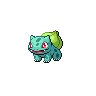

'Bulbasaur has been spotted! Catch them!!'

In [10]:
# Display an image in Jupyter notebook
# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))

#-----IMPORT REQUESTS / SET API ENDPOINT---
import requests
api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'

#-----IMPORT IPYTHON IMAGE-----------------
from IPython.display import Image
from IPython.display import display


def view_image(pokemon):
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    response = requests.get(f'{api_endpoint}{pokemon}')
    found_pokemon = {}       
    if response.status_code == 200:
        print('Success!')
        api_data = response.json()
        my_name = api_data['name']
        my_image = api_data['sprites']['front_default'] 
        if not my_image:
            my_image = None
            print("No image available")
        display(Image(f'{my_image}', width = 300))
        return(f'{my_name.title()} has been spotted! Catch them!!')
    else:
        print(f'Sorry! Error status code: {response.status_code}.\nPlease try again!')      



view_image(1)


In [4]:
# recreate your pokemon class here

#-----IMPORT REQUESTS / API ------------------
import requests
from IPython.display import Image
from IPython.display import display
api_endpoint = 'https://pokeapi.co/api/v2/pokemon/'

#-----MY CLASS-----------------------------
class gettem_pokemon():   
    
    def __init__(self, pokemon):
            self.pokemon = pokemon
            #self.name = name
            self.poke_id = None
            #self.nickname = nickname
            self.abilitities = []
            self.types = []
            self.weight = None
            self.image = None
            #self.move = move_tutor {}
            self.getsome_poke_api()  # DOUBLE CHECK

#-----API REQUEST / DICT CREATION-------------
    def getsome_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.pokemon}')
        response = requests.get(f'{api_endpoint}{self.pokemon}')
        fount_poke = {}
        
#-----CHECK STATUS / START----------------------        
        if response.status_code == 200:
            print('Success!')

#-----ATTRIBUTES---------------------------            
            
            api_data = response.json()
            self.pokemon = api_data['name']
            self.poke_id = api_data['id']
            self.abilities = [ability_object['ability']['name'] for ability_object in api_data['abilities']]
            self.types = [type_object['type']['name'] for type_object in api_data['types']]
            self.weight = api_data['weight']
            self.image = api_data['sprites']['front_default']
            if not self.image:
                self.image = None
            self.species_url = api_data['species']['url']
            found_poke = {
            'Name' : self.pokemon, 
            'Type' : self.types, 
            'Weight' : self.weight, 
            'Abilities' : self.abilities
             }
            
#-----IMAGE CALL / RETURN OF POKEMON STATS---
            display(Image(f'{self.image}', width = 300))
            print(f'{self.pokemon.title()} has been found!\nType: {self.types}\nAbilities: {self.abilities}\nWeight: {self.weight}')

#-----CHECK STATUS / END---------------------
        else:
                print(f'Sorry! Error status code: {response.status_code}')

    def print_one(self):
        display(Image(f'{self.image}', width = 300))
        print(f'{self.pokemon.title()} has been spotted!\nType: {self.types}\nAbilities: {self.abilities}\nWeight: {self.weight}')

#-----EVOLUTION HANDLERS---------------------        
    def evolve_pokemon(self, evolution_chain):
        #evolution_chain = self.get_evolution_chain()
        if not evolution_chain['evolves_to']:
            print(f'This is the final form of your Pokemon.')
            return
        current_pokemon_in_chain = evolution_chain['species']['name']
        next_pokemon_in_chain = evolution_chain['evolves_to'][0]['species']['name']
        if evolution_chain.name == self.pokemon:
            self.pokemon = next_pokemon_in_chain
            self.getsome_poke_api()
            #print(next_pokemon_in_chain)
            return
        else:
            return self.evolve_pokemon(evolution_chain['evolves_to'][0])
            
    def get_evolution_chain(self):
        response = response.get(self.species_url)
        if response.status_code == 200:
            api_data = response.json()
        evolution_chain_url = api_data['evolution_chain']['url']
        evolution_chain = response.get(evolution_chain_url)
        if evolution_chain.status_code == 200:
            return evolution_chain.json()['chain']
    

#-----USER CLASS-----------------------------
class pokedex:
    
    def __init__(self, username):
        self.username = username
        self.pokemon = {}
        
    # ADD POKEMON
    def add_pokemon(self, pokemon):
        self.pokemon[pokemon] = gettem_pokemon(pokemon)

    # PRINT COLLECTION    
    def collection(self):
        print(f"{self.username}\'s Pokemon: {', '.join(self.pokemon.keys()).title()}")

  


Success!


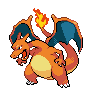

Charizard has been found!
Type: ['fire', 'flying']
Abilities: ['blaze', 'solar-power']
Weight: 905
Success!


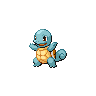

Squirtle has been found!
Type: ['water']
Abilities: ['torrent', 'rain-dish']
Weight: 90
Success!


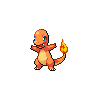

Charmander has been found!
Type: ['fire']
Abilities: ['blaze', 'solar-power']
Weight: 85
Success!


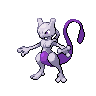

Mewtwo has been found!
Type: ['psychic']
Abilities: ['pressure', 'unnerve']
Weight: 1220
Success!


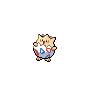

Togepi has been found!
Type: ['fairy']
Abilities: ['hustle', 'serene-grace', 'super-luck']
Weight: 15
Success!


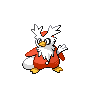

Delibird has been found!
Type: ['ice', 'flying']
Abilities: ['vital-spirit', 'hustle', 'insomnia']
Weight: 160
Yvette's Pokemon: Charizard, Squirtle, Charmander, Mewtwo, Togepi, Delibird


In [21]:
# Calling our new method

#----CREATES NEW COLLECTION VIA 'pokedex---------
yvette_pokedex = pokedex('Yvette')
yvette_collection = ['charizard', 'squirtle', 'charmander', 'mewtwo']
for pokemon in yvette_collection:
    yvette_pokedex.add_pokemon(pokemon)

#----ADDS USERS REQUESTED POKEMON TO USER'S 'pokedex{}'--
yvette_pokedex.add_pokemon('togepi')
yvette_pokedex.add_pokemon('delibird')

#----RETURNS USERNAME AND THEIR COLLECTION----------------
yvette_pokedex.collection()


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

Hello! Would you like to catch some Pokemon? y/n/cancel
y
What is your name?
Chris
Welcome Chris!

Which Pokemon would you like to find? Type "cancel" to quit
mewtwo
Sorry! Error status code: 404


TypeError: unhashable type: 'set'

Now let's evolve a few

In [ ]:
# Search the Pokemon list for the specified Pokemon.
            # Retrieve the Pokemon species URL from the Pokemon URL.
            # Check if the Pokemon has an evolution chain.
                # Retrieve the evolution chain URL.
                # Traverse the evolution chain to find the current Pokemon.
                # Check if the Pokemon can evolve further.
                    # Get the name of the evolved Pokemon.
                    # Remove the current Pokemon from the Pokedex.
                    # Add the evolved Pokemon to the Pokedex.
                    # Print a message indicating the evolution.
                    # If the Pokemon cannot evolve further, print a message.
                # Return from the method once the current Pokemon is processed.
                # If the Pokemon has no evolution chain, print a message.
                # Return from the method once the current Pokemon is processed.
    # If the specified Pokemon is not found in the Pokedex, print a message.

In [3]:
import requests

#-----MY CLASS-----------------------------
class gettem_pokemon():   
    
    def __init__(self, pokemon):
            self.pokemon = pokemon
            #self.name = name
            self.poke_id = None
            #self.nickname = nickname
            self.abilitities = []
            self.types = []
            self.weight = None
            self.image = None
            #self.move = move_tutor {}
            self.getsome_poke_api()  # DOUBLE CHECK

#-----API REQUEST / DICT CREATION-------------
    def getsome_poke_api(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.pokemon}')
        response = requests.get(f'{api_endpoint}{self.pokemon}')
        found_poke = {}
        
#-----CHECK STATUS / START----------------------        
        if response.status_code == 200:
            print('Success!')

#-----ATTRIBUTES---------------------------            
            
            api_data = response.json()
            self.pokemon = api_data['name']
            self.poke_id = api_data['id']
            self.abilities = [ability_object['ability']['name'] for ability_object in api_data['abilities']]
            self.types = [type_object['type']['name'] for type_object in api_data['types']]
            self.weight = api_data['weight']
            self.species_url = api_data['species']['url']
            self.image = api_data['sprites']['front_default']
            #print(self.image)
            if not self.image:
                self.image = None
            found_poke = {
            'Name' : self.pokemon, 
            'Type' : self.types, 
            'Weight' : self.weight, 
            'Abilities' : self.abilities
             }
            
#-----IMAGE CALL / RETURN OF POKEMON STATS---
            display(Image(f'{self.image}', width = 300))
            print(f'{self.pokemon.title()} has been found!\nType: {self.types}\nAbilities: {self.abilities}\nWeight: {self.weight}')

#-----CHECK STATUS / END---------------------
        else:
                print(f'Sorry! Error status code: {response.status_code}')
            
    def evolve_pokemon(self, evolution_chain):
        if not evolution_chain['evolves_to']:
            print(f'This is the final form of your Pokemon.')
            return
        current_pokemon_in_chain = evolution_chain['species']['name']
        next_pokemon_in_chain = evolution_chain['evolves_to'][0]['species']['name']
        if evolution_chain.name == self.pokemon:
            self.pokemon = next_pokemon_in_chain
            self.getsome_poke_api()
            #print(next_pokemon_in_chain)
            return
        else:
            return self.evolve_pokemon(evolution_chain['evolves_to'][0])
            
    
    def get_evolution_chain(self):
        response = response.get(self.species_url)
        if response.status_code == 200:
            api_data = response.json()
        evolution_chain_url = api_data['evolution_chain']['url']
        evolution_chain = response.get(evolution_chain_url)
        if evolution_chain.status_code == 200:
            return evolution_chain.json()['chain']
    

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [19]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
